参考 URL

- [Recognizing hand-written digits](http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html)

- [いまさら聞けない？scikit-learnのキホン](http://dev.classmethod.jp/machine-learning/introduction-scikit-learn/)

- [scikit-learnを使ってみた](http://labs.septeni.co.jp/entry/2017/07/10/145448)


In [25]:
from sklearn import datasets
import numpy as np
data, labels = datasets.load_digits(return_X_y=True)  # 数字データの読み込み

In [11]:
print(data.shape,labels.shape)

(1797, 64) (1797,)


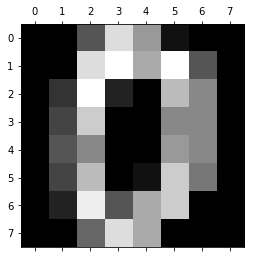

In [13]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [14]:
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [15]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.5, 
                  test_size=0.5,
                  random_state=0)

In [17]:
from sklearn import linear_model
clf = linear_model.LogisticRegression() # 識別器を作成

In [19]:
# 学習データとテストデータのインデックスを作成
train_index, test_index = next(ss.split(data))

X_train, X_test = data[train_index], data[test_index] # 学習データ，テストデータ
y_train, y_test = labels[train_index], labels[test_index] # 学習データのラベル，テストデータのラベル

In [20]:
clf.fit(X_train, y_train); # 識別器の学習

In [21]:
print(clf.score(X_train, y_train)) # 学習データの精度

0.998886414254


In [22]:
print(clf.score(X_test, y_test)) # テストデータの精度

0.944382647386


In [26]:
ss = ShuffleSplit(n_splits=10,     # 分割を10個生成
                  train_size=0.5,  # 学習は半分
                  test_size =0.5,  # テストも半分
                  random_state=0)  # 乱数種（再現用）

scores = []
for train_index, test_index in ss.split(data): # 学習データとテストデータのインデックスを作成
    
    X_train, X_test = data[train_index], data[test_index] # 学習データ，テストデータ
    y_train, y_test = labels[train_index], labels[test_index] # 学習データのラベル，テストデータのラベル

    clf.fit(X_train, y_train)         # 識別器の学習
    score = clf.score(X_test, y_test) # テストデータの精度
    scores.append(score)

scores = np.array(scores)
print(scores)

[ 0.94438265  0.95328142  0.95216908  0.94771969  0.94438265  0.95995551
  0.96106785  0.94104561  0.95661846  0.95439377]


In [28]:
scores.mean(),scores.std()

(0.95150166852057849, 0.0065278757513331257)

In [30]:
print("{0:4.2f} +/- {1:4.2f} %".format(scores.mean() * 100, scores.std() * 100))

95.15 +/- 0.65 %


In [31]:
# matplotlibの準備
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
# 学習データの分量を0.1, 0.2, ..., 0.9に
train_sizes = np.arange(0.1, 1.0, 0.1)

In [35]:
all_mean = []
all_std  = []

for train_size in train_sizes:

    ss = ShuffleSplit(n_splits=100,
                      train_size=train_size,
                      test_size=1-train_size)

    scores = []
    for train_index, test_index in ss.split(data):

        X_train, X_test = data[train_index], data[test_index]
        y_train, y_test = labels[train_index], labels[test_index]

        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        scores.append(score)

    scores = np.array(scores)
    print("train_size {0:.0f}%: {1:4.2f} +/- {2:4.2f} %".format(train_size    * 100, 
                                                                scores.mean() * 100, 
                                                                scores.std()  * 100))
    all_mean.append(scores.mean() * 100)
    all_std.append(scores.std() * 100)

train_size 10%: 90.94 +/- 1.07 %
train_size 20%: 93.05 +/- 0.67 %
train_size 30%: 93.93 +/- 0.71 %
train_size 40%: 94.79 +/- 0.67 %
train_size 50%: 94.98 +/- 0.65 %
train_size 60%: 95.46 +/- 0.74 %
train_size 70%: 95.66 +/- 0.72 %
train_size 80%: 95.83 +/- 1.02 %
train_size 90%: 96.38 +/- 1.45 %


In [39]:
# matplotlibの準備
import matplotlib.pyplot as plt
%matplotlib inline

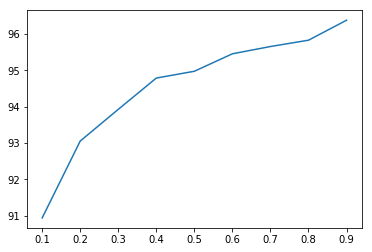

In [40]:
plt.plot(train_sizes, all_mean)

(0, 1)

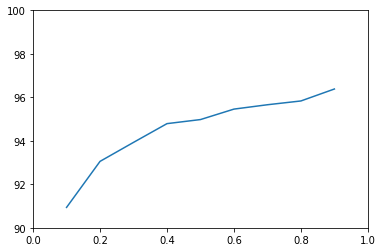

In [42]:
plt.plot(train_sizes, all_mean)
plt.ylim(90,100)
plt.xlim(0,1)

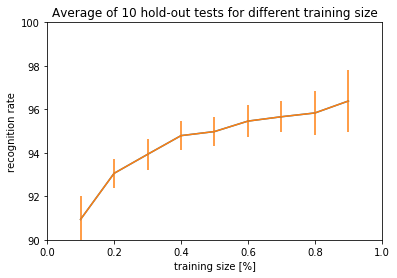

In [43]:
plt.plot(train_sizes, all_mean)
plt.ylim(90,100)
plt.xlim(0,1)
plt.errorbar(train_sizes, all_mean, yerr=all_std)
plt.xlabel("training size [%]")
plt.ylabel("recognition rate")
plt.title("Average of 10 hold-out tests for different training size")